# Prosper Loan Data Exploration
## by Thuy N.

## Preliminary Wrangling

>This [dataset](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1554486256021000) is a compilation of loans from Prosper, a peer-to-peer lending service. Variable definitions can be found [here](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0). The aim of this investigation is to determine the correlations between features of each loan, particularly how a ProsperScore is determined using information on the loanee. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load data and view first lines
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# subset the data by features of interest
cols = ['ProsperScore', 'BankcardUtilization', 'StatedMonthlyIncome', 
        'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'DebtToIncomeRatio']
df1 = df[cols].copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ProsperScore           84853 non-null   float64
 1   BankcardUtilization    106333 non-null  float64
 2   StatedMonthlyIncome    113937 non-null  float64
 3   CreditScoreRangeLower  113346 non-null  float64
 4   CreditScoreRangeUpper  113346 non-null  float64
 5   DebtToIncomeRatio      105383 non-null  float64
dtypes: float64(6)
memory usage: 5.2 MB


In [4]:
# remove all loans before July 2009 because ProsperScore were only generated for loans after July 2009
df1 = df1[df1.ProsperScore.notnull()].copy()

# DebtToIncomeRatio has some missing rows but we'll ignore those rows for the analyses involving this variable
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProsperScore           84853 non-null  float64
 1   BankcardUtilization    84853 non-null  float64
 2   StatedMonthlyIncome    84853 non-null  float64
 3   CreditScoreRangeLower  84853 non-null  float64
 4   CreditScoreRangeUpper  84853 non-null  float64
 5   DebtToIncomeRatio      77557 non-null  float64
dtypes: float64(6)
memory usage: 4.5 MB


In [5]:
# create a single feature to do a univariate exploration of CreditScoreRange
df1['CreditScoreRangeMean'] = (df1['CreditScoreRangeUpper'] - df1['CreditScoreRangeLower']) / 2 + df1['CreditScoreRangeLower']

In [6]:
# correct datatypes
df1.ProsperScore = df1.ProsperScore.astype(int)
df1.CreditScoreRangeUpper = df1.CreditScoreRangeUpper.astype(int)
df1.CreditScoreRangeLower = df1.CreditScoreRangeLower.astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ProsperScore           84853 non-null  int64  
 1   BankcardUtilization    84853 non-null  float64
 2   StatedMonthlyIncome    84853 non-null  float64
 3   CreditScoreRangeLower  84853 non-null  int64  
 4   CreditScoreRangeUpper  84853 non-null  int64  
 5   DebtToIncomeRatio      77557 non-null  float64
 6   CreditScoreRangeMean   84853 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 5.2 MB


In [7]:
# look at statistics
df1.describe()

,ProsperScore,BankcardUtilization,StatedMonthlyIncome,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,CreditScoreRangeMean
count,84853.000000,84853.000000,8.485300e+04,84853.000000,84853.000000,77557.000000,84853.000000
mean,5.950067,0.564219,5.931175e+03,699.390240,718.390240,0.258752,708.890240
std,2.376501,0.301713,8.239944e+03,47.095937,47.095937,0.318326,47.095937
min,1.000000,0.000000,0.000000e+00,600.000000,619.000000,0.000000,609.500000
25%,4.000000,0.330000,3.434000e+03,660.000000,679.000000,0.150000,669.500000
50%,6.000000,0.600000,5.000000e+03,700.000000,719.000000,0.220000,709.500000
75%,8.000000,0.830000,7.083333e+03,720.000000,739.000000,0.320000,729.500000
max,11.000000,2.500000,1.750003e+06,880.000000,899.000000,10.010000,889.500000


### What is the structure of the dataset?

>The data is a compilation of 113937 records of loans, each having 81 features. It seems the scoring system for potential loanees changes around 2009, so in my analysis I will only look at the updated system (post-2009).

### What is/are the main feature(s) of interest in the dataset?

>I'm interested in the ProsperScore and what features help predict this score. 
>The definition of **ProsperScore** found in the variable definition table is: "*A custom risk score built using historical Prosper data. The score ranges from 1-[11], with [11] being the best, or lowest risk score.  Applicable for loans originated after July 2009.*"

### What features in the dataset will help support the investigation into the feature(s) of interest?

>I expect the CreditScoreRange will have a large effect on the ProsperScore. Other things like DebtToIncomeRatio, StatedMonthlyIncome, and BankcardUtilization will likely have a correlation as well.

- **BankcardUtilization**: The percentage of available revolving credit that is utilized at the time the credit profile was pulled.
- **StatedMonthlyIncome**: The monthly income the borrower stated at the time the listing was created.
- **CreditScoreRangeLower**: The lower value representing the range of the borrower's credit score as provided by a consumer credit rating agency.
- **CreditScoreRangeUpper**: The upper value representing the range of the borrower's credit score as provided by a consumer credit rating agency. 
- **DebtToIncomeRatio**: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

## Univariate Exploration

### ProsperScore

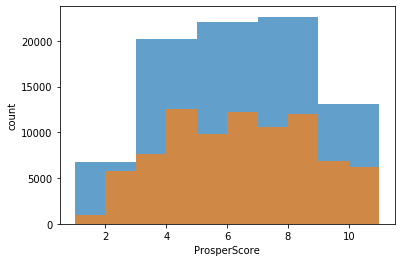

In [8]:
def plotProsperScoreDist(binsize):
    bins = np.arange(1, df1.ProsperScore.max() + binsize, binsize)
    
    plt.hist(data = df1, x='ProsperScore', bins = bins, alpha = .7)
    plt.xlabel('ProsperScore')
    plt.ylabel('count');
    
plotProsperScoreDist(2) # blue
plotProsperScoreDist(1) # orange

In [9]:
# modes aren't obvious, so look at which ProsperScores were most frequent.
df1.ProsperScore.value_counts()

4     12595
6     12278
8     12053
7     10597
5      9813
3      7642
9      6911
2      5766
10     4750
11     1456
1       992
Name: ProsperScore, dtype: int64

Looking at the orange distribution, we can see there aren't really any obvious modes. The 4 most common ProsperScores were pretty close in frequency. No outliers, since scores are given from 1-10.

### CreditScoreRangeMean

In [10]:
# CreditScoreRangeMean
def plotCreditScoreRangeMeanDistribution(binsize):
    bins = np.arange(600, df1.CreditScoreRangeMean.max() + binsize, binsize)

    plt.hist(data=df1, x='CreditScoreRangeMean', bins = bins, alpha = .7)
    plt.xlabel('Credit Score Range Mean')
    plt.ylabel('count');

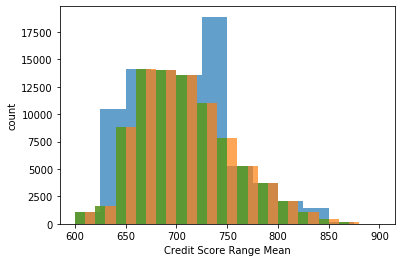

In [11]:
# trying different binsizes to get the plot to look closer to a normal curve
# binsize 10 and 20 makes the same distribution
plotCreditScoreRangeMeanDistribution(25) # blue
plotCreditScoreRangeMeanDistribution(20) # orange
plotCreditScoreRangeMeanDistribution(10) # green

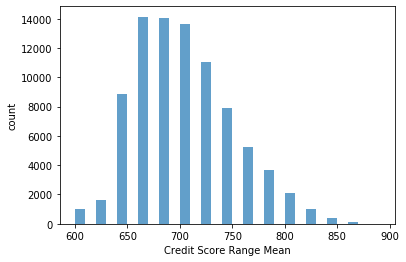

In [12]:
# taking a look at the best distribution
plotCreditScoreRangeMeanDistribution(10)

The CreditScoreRangeMean distribution is unimodal with a slight right skew. There are steep jumps in frequency before the peak. After the peak, the frequencies have a more even descension. When trying different binsizes, we can see that binsize 10 and 20 make the same distribution.

### DebtToIncomeRatio

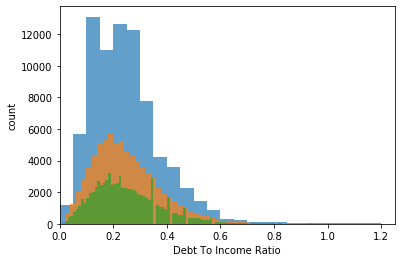

In [13]:
# DebtToIncomeRatio
def plotDebtToIncomeRatioDist(binsize):
    bins = np.arange(0, df1.DebtToIncomeRatio.max() + binsize, binsize)

    plt.hist(data=df1, x='DebtToIncomeRatio', bins = bins, alpha=.7)
    plt.xlabel('Debt To Income Ratio')
    plt.ylabel('count');
    
    # select to exclude outliers and expand distribution
    plt.xlim(0, 1.25);
    
plotDebtToIncomeRatioDist(.05) # blue
plotDebtToIncomeRatioDist(.02) # orange
plotDebtToIncomeRatioDist(.01) # green

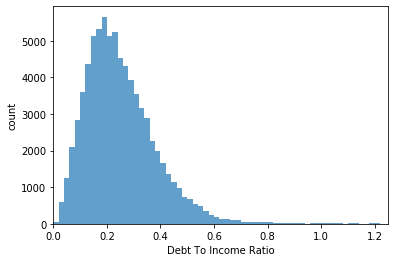

In [14]:
# best distribution
plotDebtToIncomeRatioDist(.02)

In [15]:
# look at outliers excluded from distribution
df1[df1.DebtToIncomeRatio > 1.25].DebtToIncomeRatio.describe()

count    201.000000
mean       4.837463
std        3.346866
min        1.260000
25%        1.800000
50%        3.660000
75%        8.270000
max       10.010000
Name: DebtToIncomeRatio, dtype: float64

Plotting with binsize 0.02 gives us the best view of the distribution. The plot is unimodal and skewed to the right. There are 201 outliers (which makes up 0.0024% of the data).

### BankcardUtilization

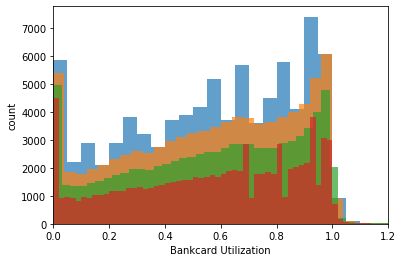

In [16]:
# BankcardUtilization
def plotBankcardUtilizationDist(binsize):
    bins = np.arange(0, df1.BankcardUtilization.max() + binsize, binsize)

    plt.hist(data=df1, x='BankcardUtilization', bins = bins, alpha=.7)
    plt.xlabel('Bankcard Utilization');
    plt.ylabel('count');
    
    # select to exclude outliers
    plt.xlim(0, 1.2);
    
plotBankcardUtilizationDist(.05) # blue 
plotBankcardUtilizationDist(.04) # orange
plotBankcardUtilizationDist(.03) # green
plotBankcardUtilizationDist(.02) # red

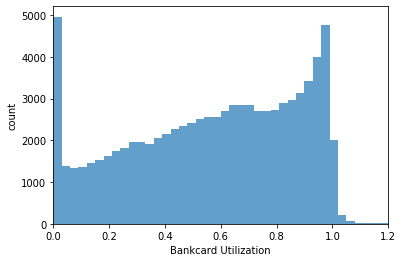

In [17]:
# best distribution
plotBankcardUtilizationDist(.03)

In [18]:
# look at outliers excluded from distribution
df1[df1.BankcardUtilization > 1.2].BankcardUtilization.describe()

count    31.000000
mean      1.471290
std       0.340928
min       1.220000
25%       1.255000
50%       1.320000
75%       1.540000
max       2.500000
Name: BankcardUtilization, dtype: float64

This distribution is bimodal, with the mode being 0. We can see an almost linear trend after 0 up to around 0.25 and from around .3-0.65. We have 31 outliers after 1.2.

### StatedMonthlyIncome

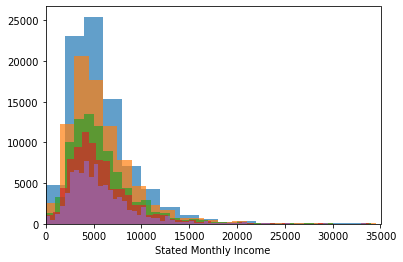

In [19]:
# StatedMonthlyIncome
def plotStatedMonthlyIncomeDist(binsize):
    bins = np.arange(0, df1.StatedMonthlyIncome.max() + binsize, binsize)

    plt.hist(data=df1, x='StatedMonthlyIncome', bins = bins, alpha=.7)
    plt.xlabel('Stated Monthly Income');
    
    # select to exclude outliers
    plt.xlim(0, 35000);

plotStatedMonthlyIncomeDist(2000)
plotStatedMonthlyIncomeDist(1500)
plotStatedMonthlyIncomeDist(1000)
plotStatedMonthlyIncomeDist(750)
plotStatedMonthlyIncomeDist(500)

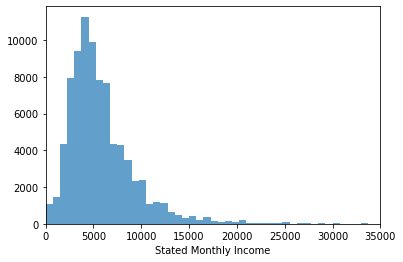

In [20]:
# best distribution
plotStatedMonthlyIncomeDist(750)

In [21]:
# look at outliers excluded from distribution
df1[df1.StatedMonthlyIncome > 35000].StatedMonthlyIncome.describe()

count    1.560000e+02
mean     7.902143e+04
std      1.566655e+05
min      3.541667e+04
25%      3.958333e+04
50%      4.541667e+04
75%      6.927083e+04
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

The distribution is unimodal, with a right skew. Around \\$5000 is where we see the highest frequency of monthly income. The outliers are quite extreme; there are 152 of them with the highest being \\$1.75 million per month. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>Most of the variables had a distribution that had a mode on the left side of the graph, with a right skew. There were a small percentage of outliers (less than .5%) in each graph, but they hugely skewed the statistics of each graph.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>BankcardUtilization and ProsperScore were the 2 distributions that have didn't have curves, and didn't look anything like a normal distribution. It's also interesting to note that some records have over 100% credit utilization. There were several distributions that had a lot of outliers as well, but that's to be expected because the ranges of certain variables were not limited, unlike credit score, for example, where 900 is the max.

## Bivariate Exploration

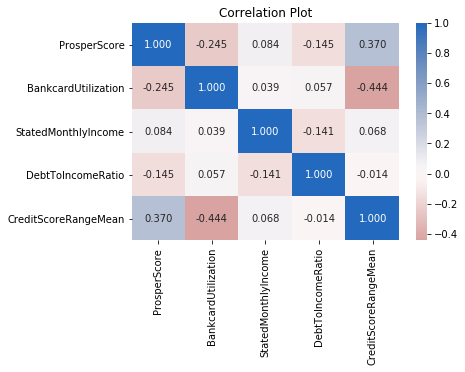

In [22]:
# look at the correlation coefficient of each pair
cols = ['ProsperScore', 'BankcardUtilization', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'CreditScoreRangeMean']
sb.heatmap(df1[cols].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot') 
plt.show()

There are no strong correlations between any pairs. We see the factor with the highest positive correlation with ProsperScore is the CreditScoreRangeMean, with a coefficient of 0.363, and the weakest correlation regarding ProsperScore is the StatedMonthlyIncome. This suggests that it's not a single factor that contributes to the ProsperScore grading.

### ProsperScore vs. CreditScoreRangeMean

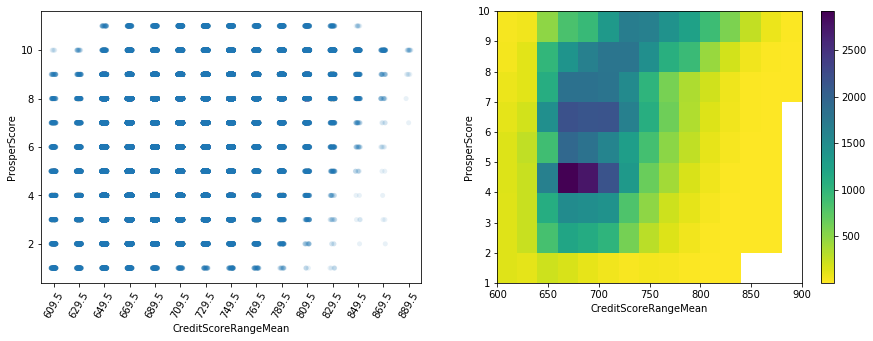

In [23]:
plt.figure(figsize=(15, 5))

# scatterplot exploration
plt.subplot(1, 2, 1)
sb.stripplot(data=df1, x='CreditScoreRangeMean', y='ProsperScore', alpha=.1, color=sb.color_palette()[0])
plt.xticks(rotation=60);

# create a heatmap since a lot of points coincide
plt.subplot(1, 2, 2)
x_bins = np.arange(600, df1.CreditScoreRangeMean.max() + 20, 20)
y_bins = range(1, 11)
plt.hist2d(data=df1, x='CreditScoreRangeMean', y='ProsperScore', bins = [x_bins, y_bins], cmap='viridis_r', cmin=1)
plt.xlabel('CreditScoreRangeMean')
plt.ylabel('ProsperScore')
plt.colorbar();

From the heatmap, we can see that having a lower credit score doesn't necessarily exclude you from being able to get a high ProsperScore. Though the most frequent credit and prosper score pairs seems to be in the 650-700 : 4 region, you can also see a positive trend in higher credit score and higher ProsperScore.

### ProsperScore vs. DebtToIncomeRatio

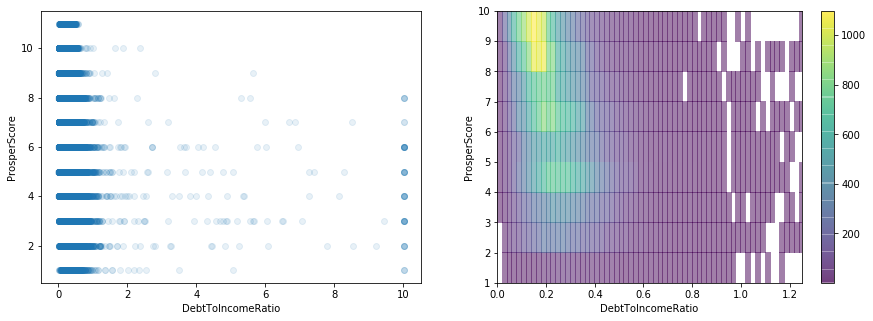

In [24]:
plt.figure(figsize=(15, 5))

# scatterplot
plt.subplot(1, 2, 1)
plt.scatter(data=df1, x='DebtToIncomeRatio', y='ProsperScore', alpha=.1, color=sb.color_palette()[0])
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('ProsperScore');

# heatmap, excluding outliers
plt.subplot(1, 2, 2)
binsize = 0.02
bins = np.arange(0, df1.DebtToIncomeRatio.max()+ binsize, binsize)
plt.hist2d(data=df1[~df1.DebtToIncomeRatio.isnull()], x='DebtToIncomeRatio', y='ProsperScore', 
           bins=[bins, range(1, 11)], alpha=.5, cmin=1)
plt.xlim(0, 1.25)
plt.colorbar()
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('ProsperScore');


### ProsperScore vs. BankcardUtilization

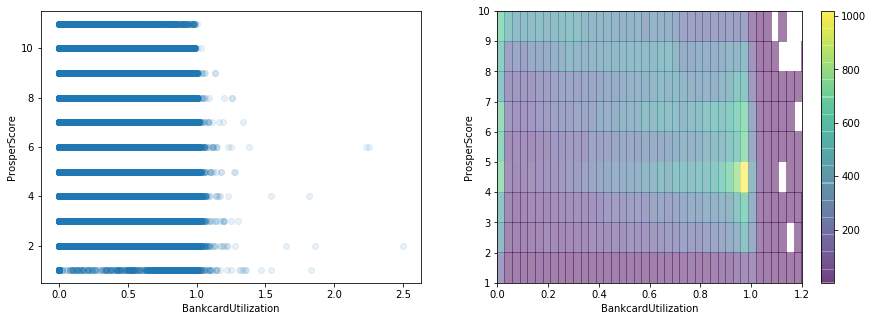

In [25]:
plt.figure(figsize=(15, 5))

# scatterplot
plt.subplot(1, 2, 1)
plt.scatter(data=df1, x='BankcardUtilization', y='ProsperScore', alpha=.1, color=sb.color_palette()[0])
plt.xlabel('BankcardUtilization')
plt.ylabel('ProsperScore');

# heatmap, excluding outliers
plt.subplot(1, 2, 2)
binsize = 0.03
bins = np.arange(0, df1.BankcardUtilization.max()+ binsize, binsize)
plt.hist2d(data=df1, x='BankcardUtilization', y='ProsperScore', 
           bins=[bins, range(1, 11)], alpha=.5, cmin=1)
plt.xlim(0, 1.2)
plt.colorbar()
plt.xlabel('BankcardUtilization')
plt.ylabel('ProsperScore');

### ProsperScore vs. StatedMonthlyIncome

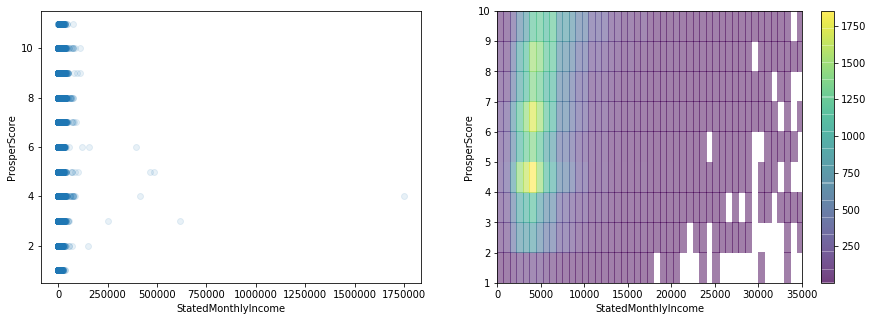

In [26]:
plt.figure(figsize=(15, 5))

# scatterplot
plt.subplot(1, 2, 1)
plt.scatter(data=df1, x='StatedMonthlyIncome', y='ProsperScore', alpha=.1, color=sb.color_palette()[0])
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('ProsperScore');

# heatmap, excluding outliers
plt.subplot(1, 2, 2)
binsize = 750
bins = np.arange(0, df1.StatedMonthlyIncome.max()+ binsize, binsize)
plt.hist2d(data=df1, x='StatedMonthlyIncome', y='ProsperScore',
           bins=[bins, range(1, 11)], alpha=.5, cmin=1)
plt.xlim(0, 35000)
plt.colorbar()
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('ProsperScore');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!